## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = mouse_df["Mouse ID"].count()
mouse_count


1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_df[mouse_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_df[mouse_df.duplicated(["Mouse ID"])]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_df.drop_duplicates("Mouse ID")
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse["Mouse ID"].count()
clean_mouse_count

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_data = mouse_df.groupby("Drug Regimen")
mean = regimen_data["Tumor Volume (mm3)"].mean()
median = regimen_data["Tumor Volume (mm3)"].median()
variance = regimen_data["Tumor Volume (mm3)"].var()
standard_dev = regimen_data["Tumor Volume (mm3)"].std()
sem = regimen_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_summary = pd.DataFrame({"Mean": mean,
                               "Median": median,
                               "Variance": variance,
                               "Standard Deviation": standard_dev,
                               "SEM": sem})
regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_data.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

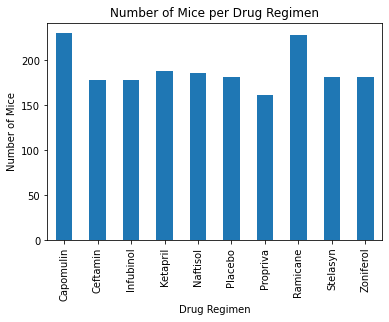

In [31]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_count_regimen = mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 
panda_bar = mice_count_regimen.plot(kind='bar')
# Fix formatting
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")


Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

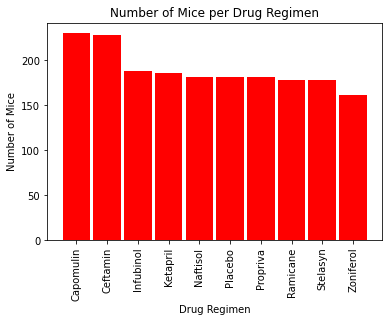

In [33]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
regimen_list =  mouse_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(regimen_list)) 
plt.bar(x_axis, regimen_list, color = "r", width = 0.9)
ticks = [value for value in x_axis]
plt.xticks(ticks, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])
# Fix formatting
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")

Text(0.5, 1.0, 'Gender Distribution')

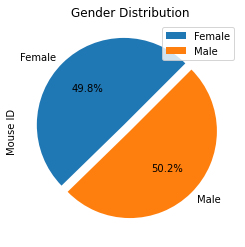

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = clean_mouse.groupby(["Sex"]).count()
gender_data.plot(kind="pie", y= "Mouse ID", autopct='%1.1f%%', explode = (0.1, 0), startangle= 45)
plt.title("Gender Distribution")


Text(0.5, 1.0, 'Gender Distribution')

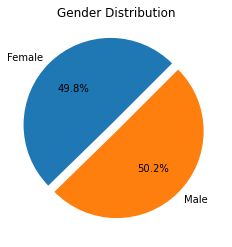

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ["Female", "Male"]
gender_count= [124, 125]
plt.pie(gender_count, labels=labels, autopct="%1.1f%%", startangle=45, explode = (0.1, 0))
# Formatting
plt.title("Gender Distribution")


## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = pd.DataFrame(mouse_df.groupby('Mouse ID')['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merge = pd.merge(mouse_df, max_time, on='Mouse ID',  how="outer").rename(columns={'Timepoint_y': 'Max_Timepoint'})
timepoint_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [85]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_count = []

# Create loop
for drug in drug_list:
    
    drug_df= timepoint_merge.loc[timepoint_merge['Drug Regimen'] == drug]
    
    # Locate the rows which contain mice on each drug and timepoints
    tumor_volume = drug_df.loc[drug_df['Timepoint_x'] == drug_df['Max_Timepoint']]
    
    # Get tumor volumes
    volume = tumor_volume['Tumor Volume (mm3)']
    tumor_vol_count.append(volume)
    
    # Calculate the IQR 
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print("IQR for " + str(drug) + ": " + str(iqr))
    
    # Determine outlier boundaries using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print("Lower Bound for " + str(drug) + ": " + str(lower_bound))
    print("Upper Bound for " + str(drug) + ": " + str(upper_bound))
          
    # Quantitative outlier check
    outliers = (volume.loc[(tumor_volume['Tumor Volume (mm3)'] >= upper_bound) |  
                                        (tumor_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print("Number of outliers for " + str(drug) + ": " + str(outliers))

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of outliers for Capomulin: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of outliers for Ramicane: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of outliers for Infubinol: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of outliers for Ceftamin: 0


([<matplotlib.axis.XTick at 0x7facb5038640>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

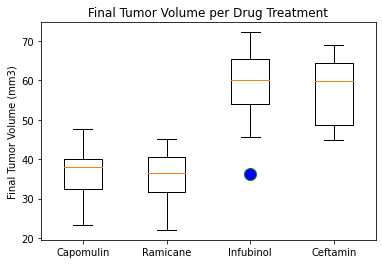

In [95]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='blue', markersize=12,
                  markeredgecolor='green')
plt.boxplot(tumor_vol_count, flierprops=flierprops)
plt.title('Final Tumor Volume per Drug Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment Progression of Mouse s185')

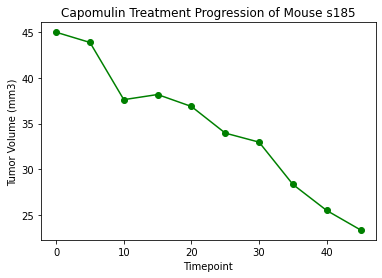

In [105]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Locate a mouse that had this treatment
cap_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin"]
cap_df.head()
# Grab data from mouse by mouse id 
cap_mouse = mouse_df.loc[mouse_df['Mouse ID'] == "s185"]
# Generate line plot
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'], marker= "o", color = "green")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment Progression of Mouse s185")

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

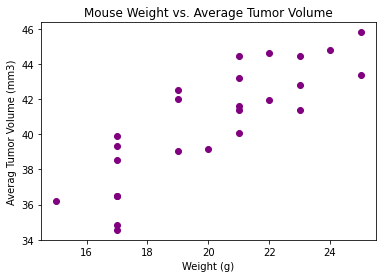

In [129]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_size =cap_df.groupby(['Mouse ID']).mean()

plt.scatter(avg_size['Weight (g)'],avg_size['Tumor Volume (mm3)'], color="purple")
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
